# 225229141
# SURUTHI S
# PML LAB 4 - HOUSE PRICE PREDICTION USING LR WITH REGULARIZATION

# STEP 1  : IMPORT DATASET

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
ames = pd.read_csv("/content/Ames_House_Sales_Cropped.csv")

In [ ]:
ames.shape #81 columns and 2051 records

(1379, 39)

In [ ]:
ames.info() # There are a lot of columns

In [ ]:
ames.describe().T #Summary statistics 

In [ ]:
ames.isnull().sum()

# STEP 2  : PREDICT SALE PRICE WITHOUT CATEGORICAL FEATURES

In [ ]:
exc = ames[['BldgType','CentralAir']]

In [ ]:
exc

,BldgType,CentralAir
0,1Fam,Y
1,1Fam,Y
2,1Fam,Y
3,1Fam,Y
4,1Fam,Y
...,...,...
1374,1Fam,Y
1375,1Fam,Y
1376,1Fam,Y
1377,1Fam,Y


In [ ]:
ames = ames.select_dtypes(exclude = ['object'])

In [ ]:
ames.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'SalePrice'],
      dtype='object')

In [ ]:
len(ames.columns)

37

# TRAIN TEST SPLIT

In [ ]:
ames_copy = ames.copy()

In [ ]:
ames_copy = ames_copy.dropna()

In [ ]:
ames_copy.isnull().sum()

In [ ]:
ames_copy.shape

(1379, 37)

In [ ]:
labels = ames_copy[['SalePrice']]

In [ ]:
features = ames_copy.drop(columns=['SalePrice'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(y_test,y_pred)

In [ ]:
mse

1474827325.5975182

# STEP 3  :  Scatter plot

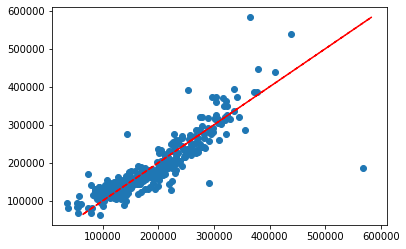

In [ ]:
plt.scatter(y_pred,y_test)
plt.plot(y_test,y_test,'r--')

# STEP 4  : ENCODE CATEGORICAL COLUMNS

In [ ]:
exc.dropna()

In [ ]:
ames_copy.shape

(1379, 37)

In [ ]:
# ames_copy = ames_copy.join(except_data.set_index(ames_copy.index))

In [ ]:
ames_cat=pd.merge(ames_copy, exc, left_index=True, right_index=True)

In [ ]:
ames_cat.shape

(1379, 39)

In [ ]:
ames_cat.isnull().sum()

In [ ]:
type(ames_cat)

pandas.core.frame.DataFrame

In [ ]:
ames_cat[['BldgType']]

,BldgType
0,1Fam
1,1Fam
2,1Fam
3,1Fam
4,1Fam
...,...
1374,1Fam
1375,1Fam
1376,1Fam
1377,1Fam


# get dummies

In [ ]:
ames_oh = pd.get_dummies(ames_cat)

In [ ]:
ames_oh

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd,YrSold,SalePrice,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,CentralAir_N,CentralAir_Y
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,2003,2008,208500.0,1,0,0,0,0,0,1
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,1976,2007,181500.0,1,0,0,0,0,0,1
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,2002,2008,223500.0,1,0,0,0,0,0,1
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,1970,2006,140000.0,1,0,0,0,0,0,1
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,2000,2008,250000.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,2000,2007,175000.0,1,0,0,0,0,0,1
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,1988,2010,210000.0,1,0,0,0,0,0,1
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,2006,2010,266500.0,1,0,0,0,0,0,1
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,1996,2010,142125.0,1,0,0,0,0,0,1


In [ ]:
ames_oh.shape

(1379, 44)

In [ ]:
ames_oh.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'SalePrice', 'BldgType_1Fam',
       'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'CentralAir_N', 'CentralAir_Y'],
      dtype='object')

# STEP 5 : Predict Sale Price WITH CATEGORICAL FEATURES

In [ ]:
x_features_cat = ames_oh.drop('SalePrice',axis = 1)

In [ ]:
x_features_cat.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold', 'BldgType_1Fam', 'BldgType_2fmCon',
       'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'CentralAir_N',
       'CentralAir_Y'],
      dtype='object')

In [ ]:
x_label_cat = ames_oh[['SalePrice']]

In [ ]:
x_label_cat

In [ ]:
lin_reg_cat = LinearRegression()

In [ ]:
x_train_cat,x_test_cat,y_train_cat,y_test_cat = train_test_split(x_features_cat,x_label_cat,test_size = 0.25,random_state=42)

In [ ]:
lin_reg_cat.fit(x_train_cat,y_train_cat)
#fitting the model

LinearRegression()

In [ ]:
y_pred_cat = lin_reg_cat.predict(x_test_cat)

In [ ]:
mse_cat = mean_squared_error(y_pred_cat,y_test_cat)

In [ ]:
mse_cat

1461036570.1435425

# STEP 6  : Nomalizing using Standard Scalar and Predict sales Price

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
#xtrain
scaled_x_train_norm = scale.fit_transform(x_train_cat)

In [ ]:
# xtest
scaled_x_test_norm = scale.transform(x_test_cat)

In [ ]:
lin_reg_norm = LinearRegression()

In [ ]:
lin_reg_norm.fit(scaled_x_train_norm,y_train_cat)

LinearRegression()

In [ ]:
y_pred_norm = lin_reg_norm.predict(scaled_x_test_norm)

In [ ]:
mse_norm = mean_squared_error(y_pred_norm,y_test_cat)
mse_norm

1461036570.1437426

# STEP 7  : Normalize using MinMax Scaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler()

In [ ]:
# xtrain
scaled_x_train_minmax = minmax.fit_transform(x_train_cat)

In [ ]:
# xtest
scaled_x_test_minmax = minmax.transform(x_test_cat)

In [ ]:
lin_reg_std = LinearRegression()

In [ ]:
lin_reg_std.fit(scaled_x_train_minmax,y_train_cat)

LinearRegression()

In [ ]:
y_pred_std = lin_reg_std.predict(scaled_x_test_minmax)

In [ ]:
mse_std = mean_squared_error(y_pred_std,y_test_cat)
mse_std

1461036570.143742

# Step 8 SGD REGRESSION

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# using scaled_x_train_norm and scaled_x_test_norm

In [ ]:
sgd = SGDRegressor()

In [ ]:
sgd.fit(scaled_x_train_norm,y_train_cat)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor()

In [ ]:
y_pred_sgd = sgd.predict(scaled_x_test_norm)

In [ ]:
mse_sgd = mean_squared_error(y_pred_sgd,y_test_cat)
mse_sgd

1427014934.7019606

# L2 REGULARIZATION

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge = Ridge()

In [ ]:
# using scaled_x_train_norm and scaled_x_test_norm

In [ ]:
ridge.fit(scaled_x_train_norm,y_train)

Ridge()

In [ ]:
y_pred_ridge = ridge.predict(scaled_x_test_norm)

In [ ]:
mse_ridge = mean_squared_error(y_pred_ridge,y_test_cat)
mse_ridge

1458946958.0904448

# L1 Regularization

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso=Lasso()

In [ ]:
lasso.fit(scaled_x_train_norm,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.554e+11, tolerance: 6.588e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [ ]:
y_pred_lasso = lasso.predict(scaled_x_test_norm)

In [ ]:
mse_lasso = mean_squared_error(y_pred_lasso,y_test_cat)
mse_lasso

1460906418.115904

# Step 9 RMSE

In [ ]:
print("RMSE WITHOUT ONE HOT ENCODING : ",round(mean_squared_error(y_test,y_pred,squared=False)))
print("RMSE WITH ONE HOT ENCODING : ",round(mean_squared_error(y_pred_cat,y_test_cat,squared=False)))
print("RMSE WITH OHE and StandardScaler : ",round(mean_squared_error(y_pred_norm,y_test_cat,squared=False)))
print("RMSE WITH OHE and MinMaxScaler: ",round(mean_squared_error(y_pred_std,y_test_cat,squared=False)))
print("RMSE OF SGDRegressor WITH OHE and StandardScaler : ",round(mean_squared_error(y_pred_sgd,y_test_cat,squared=False)))
print("RMSE OF RidgeCV  WITH OHE and StandardScaler: ",round(mean_squared_error(y_pred_ridge,y_test_cat,squared=False)))
print("RMSE OF LassoCV  WITH OHE and StandardScaler: ",round(mean_squared_error(y_pred_lasso,y_test_cat,squared=False)))

RMSE WITHOUT ONE HOT ENCODING :  38403
RMSE WITH ONE HOT ENCODING :  38224
RMSE WITH OHE and StandardScaler :  38224
RMSE WITH OHE and MinMaxScaler:  38224
RMSE OF SGDRegressor WITH OHE and StandardScaler :  37776
RMSE OF RidgeCV  WITH OHE and StandardScaler:  38196
RMSE OF LassoCV  WITH OHE and StandardScaler:  38222


NameError: ignored